In [142]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.io.wavfile
from matplotlib.axes import *
from numpy.fft import *
import scipy.signal


We open the music file.

In [143]:
fs, piano = scipy.io.wavfile.read('PianoA4Excerpt.wav') 

#fs is sample rate

dt = 1/fs


In [144]:
time = np.arange(0, len(piano)*dt, dt)

Now we take its fourier transform as we want to determine its frequency spectrum

In [145]:
pianofft = fftshift((fft(ifftshift(piano)))) * dt
freqaxis = fftshift(fftfreq(len(pianofft), dt))

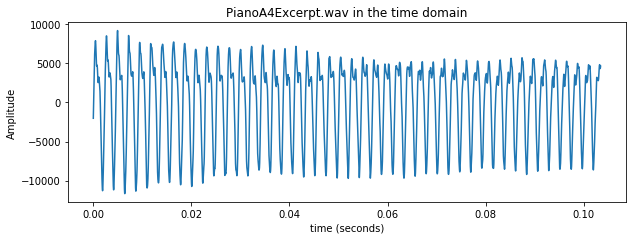

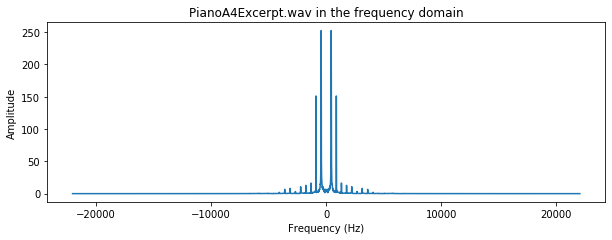

In [160]:
plt.figure(figsize=[10, 3.3])
plt.plot(time, piano)
plt.ylabel('Amplitude')
plt.xlabel('time (seconds)')
plt.title("PianoA4Excerpt.wav in the time domain")
plt.savefig("time_domain", dpi=600)


plt.figure(figsize=[10, 3.3])
plt.plot(freqaxis, abs(pianofft))
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.title("PianoA4Excerpt.wav in the frequency domain")
plt.savefig("freq_domain", dpi=600)

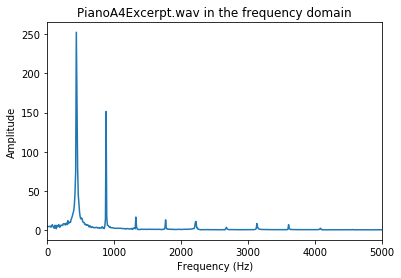

In [60]:
#plt.figure(figsize=[12, 2.1])
plt.plot(freqaxis, abs(pianofft))
plt.xlim(0,5000)
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.title("PianoA4Excerpt.wav in the frequency domain")
plt.savefig("freq_domainzoom")

In [95]:
print(scipy.signal.find_peaks(abs(pianofft), height=(10)))

(array([2051, 2098, 2144, 2190, 2228, 2236, 2246, 2249, 2313, 2316, 2326,
       2334, 2372, 2418, 2464, 2511]), {'peak_heights': array([ 10.82902352,  12.88673936,  16.46435749, 151.25929664,
        15.24021889, 252.52957225,  10.02875362,  11.82228396,
        11.82228396,  10.02875362, 252.52957225,  15.24021889,
       151.25929664,  16.46435749,  12.88673936,  10.82902352])})


In [82]:
print(freqaxis[2326] - freqaxis[2372])

-444.5759368836291


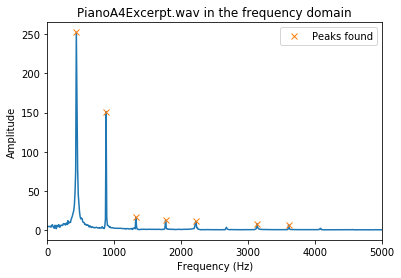

The first peak is,434.91124260355025
The second peak is,879.4871794871793
The third peak is,1324.0631163708085
The fourth peak is,1768.6390532544376


In [137]:
peaks, peakheight = scipy.signal.find_peaks(abs(pianofft), prominence=5)


plt.plot(freqaxis,abs(pianofft))
plt.plot(freqaxis[peaks], abs(pianofft)[peaks], "x", label='Peaks found')
plt.legend()
plt.xlim(0,5000)
plt.title("PianoA4Excerpt.wav in the frequency domain")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.savefig("peaks", dpi=1000)
plt.show()

print("The first peak is," +str(freqaxis[peaks[8]]))
print("The second peak is," +str(freqaxis[peaks[9]]))
print("The third peak is," +str(freqaxis[peaks[10]]))
print("The fourth peak is," +str(freqaxis[peaks[11]]))

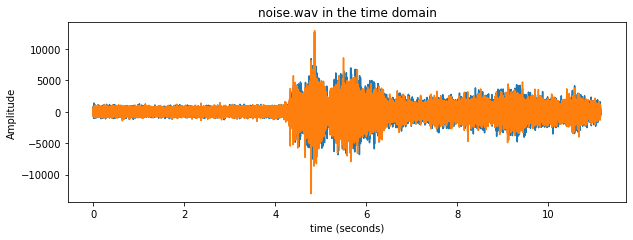

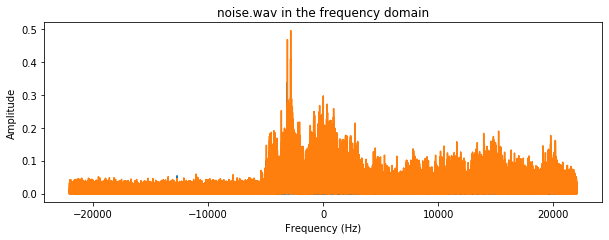

In [159]:
fs2, noise = scipy.io.wavfile.read('noise.wav') 
time2 = np.arange(0, len(noise)*dt, dt)

dt2 = 1/fs2
noisefft = fftshift((fft(ifftshift(noise)))) * dt
freqaxis2 = fftshift(fftfreq(len(noisefft), dt))


plt.figure(figsize=[10, 3.3])
plt.plot(time2, noise)
plt.ylabel('Amplitude')
plt.xlabel('time (seconds)')
plt.title("noise.wav in the time domain")
plt.savefig("time_domain2", dpi=600)


plt.figure(figsize=[10, 3.3])
plt.plot(freqaxis2, abs(noisefft))
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.title("noise.wav in the frequency domain")
plt.savefig("freq_domain2", dpi=600)